In [1]:
# https://www.kaggle.com/code/abdo1353/wind-speed-pred-linear-regression-decision-tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
for dirname, _, filenames in os.walk('wind_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv('wind_dataset.csv')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [6]:
df.shape

(6574, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [9]:
round(df.describe() , 3) 

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000,6574.000,6574.000,6513.000,5953.000,6513.000,5900.000,6214.000
mean,9.797,0.392,1.885,0.356,13.339,0.464,6.412,2.737
std,4.977,1.179,4.031,1.129,4.891,1.178,4.637,5.569
min,0.000,0.000,0.000,0.000,-0.100,0.000,-11.500,-14.400
25%,6.000,0.000,0.000,0.000,9.600,0.000,3.000,-1.000
50%,9.210,0.000,0.200,0.000,13.300,0.000,6.500,3.000
75%,12.960,0.000,2.000,0.000,17.200,0.000,10.000,7.000
max,30.370,4.000,67.000,4.000,26.800,4.000,18.000,15.800


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [12]:
colu = ["IND.1","T.MAX" ,"IND.2" ,"T.MIN" ,"T.MIN.G" ]
for i in colu:
    print(i)
    print(df[i].mode())

IND.1
0    0.0
Name: IND.1, dtype: float64
T.MAX
0    10.0
Name: T.MAX, dtype: float64
IND.2
0    0.0
Name: IND.2, dtype: float64
T.MIN
0    9.0
Name: T.MIN, dtype: float64
T.MIN.G
0    5.0
Name: T.MIN.G, dtype: float64


In [13]:
FilterInd1 = 0.0
FilterTmax = 10.0
FilterInd =0.0
FilterTMIN = 9.0
FilterTMIN_g = 5.0
df["IND.1"].fillna(FilterInd1 , inplace = True)
df["T.MAX"].fillna(FilterTmax , inplace = True)
df["IND.2"].fillna(FilterInd , inplace = True)
df["T.MIN"].fillna(FilterTMIN , inplace = True)
df["T.MIN.G"].fillna(FilterTMIN_g , inplace = True)

In [14]:
df.isnull().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [15]:
df['DATE'] =pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [16]:
df["Year"] = df['DATE'].dt.year
df["month"] = df['DATE'].dt.month
df["day"] = df['DATE'].dt.day

In [17]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Year,month,day
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


<AxesSubplot:xlabel='WIND'>

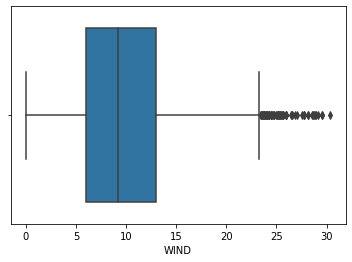

In [25]:
#Finding Outliers
sns.boxplot(x=df['WIND'])

In [26]:
filter1 = (df['WIND'] >25) 
filter1.value_counts()

False    6538
True       36
Name: WIND, dtype: int64

In [27]:
for i in np.where(df["WIND"]>=23):
    df.drop(i,inplace = True)

(array([ 196.,  794., 1084., 1209., 1106.,  814.,  595.,  387.,  211.,
         102.]),
 array([ 0.   ,  2.295,  4.59 ,  6.885,  9.18 , 11.475, 13.77 , 16.065,
        18.36 , 20.655, 22.95 ]),
 <BarContainer object of 10 artists>)

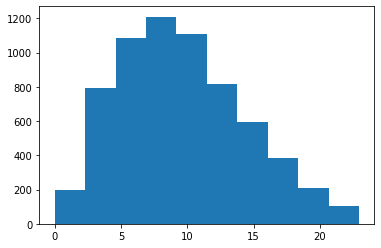

In [28]:
plt.hist(df["WIND"])

In [33]:
filter2 =df[(df['WIND'] >=10)]
pd.DataFrame(filter2['month'].value_counts())

,month
1,332
12,325
3,300
11,263
2,261
4,247
10,234
9,193
5,192
6,156


In [34]:
filter3 =df[(df['WIND'] >=10) & (df["RAIN"]<=10)  ]
pd.DataFrame(filter3['month'].value_counts())

,month
1,311
12,303
3,285
11,251
2,250
4,234
10,222
5,185
9,176
6,154


In [35]:
df.drop("Year" ,axis =1 ,inplace =True)
df.drop("day" ,axis =1 ,inplace =True)
df.drop("DATE" ,axis =1 ,inplace =True)

In [36]:
X = df.drop('WIND',axis =1)
y = df["WIND"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0 ,shuffle=False)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg =LinearRegression()
reg.fit(X_train,y_train)
predict = reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 3.5228008136005338
MSE: 19.32029328600457
RMSE: 4.395485557478783


In [39]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,month
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1
